In [6]:
import numpy as np


In [1]:
from colossus.cosmology import cosmology 


In [8]:
from matplotlib import pyplot as plt
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e337c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rcParams.update({
	"text.usetex": True,
	"font.family": "serif",
	"font.serif": ["Computer Modern Roman"],
	'font.size': 12,
})

In [4]:
C_km = 3e5 #km/s


In [2]:
cosmo = cosmology.setCosmology('WMAP7') 


In [9]:
h = cosmo.h

In [5]:
def Mk(k, z):
    '''
    M(k), Unit: 1; 
    give me k in /Mpc!
    '''
    H0 = cosmo.H0
    Ob0, Om0, h = cosmo.Ob0, cosmo.Om0, cosmo.h
    Tcmb0 = cosmo.Tcmb0
    Dz = cosmo.growthFactor( z )
    Tk = cosmology.power_spectrum.transferFunction( k/h, h, Om0, Ob0, Tcmb0 )
    Mk = 2/(3*Om0*H0*H0) * 0.76* Dz * C_km*C_km * Tk * k * k  #units:1 
    return Mk


In [7]:
kns = [0.04, 0.08, 0.12]
# zs = np.linspace(8, 12, 41)
zs = np.linspace(9, 12, 31)
# zs = np.linspace(10, 12, 21)

show matter ps

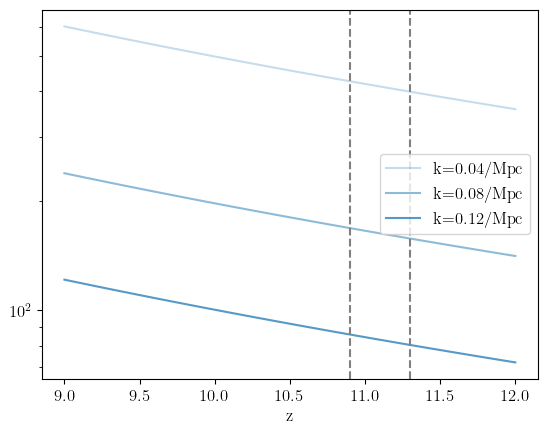

In [11]:
for k in kns:
    plt.plot(zs, cosmo.matterPowerSpectrum(k/h, zs, model='eisenstein98') /(h**3) , label="k={:.2f}/Mpc".format(k), color="C0", alpha=k/0.16) # (Mpc)^3
plt.yscale('log')
plt.xlabel('z')
plt.axvline(11.3, color='gray', linestyle='dashed')
plt.axvline(10.9, color='gray', linestyle='dashed')
plt.legend()

show M(k,z)

/Users/siyizhao/opt/anaconda3/envs/astropy/lib/python3.8/site-packages/colossus/cosmology/power_spectrum.py:413: UserWarning: transferFunction() is deprecated and will be removed in a future version. Please use powerSpectrum() instead.
  warnings.warn('transferFunction() is deprecated and will be removed in a future version. Please use powerSpectrum() instead.')


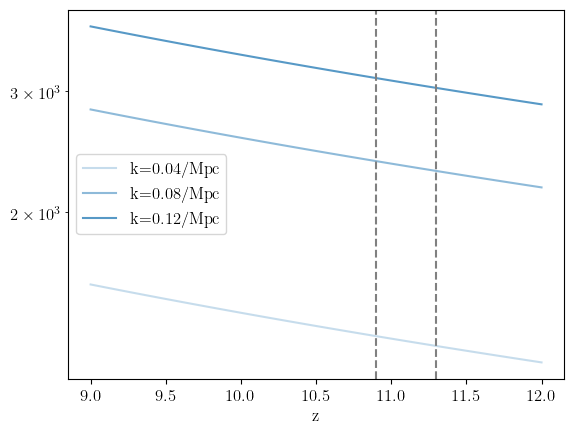

In [12]:
for k in kns:
    plt.plot(zs, Mk(k, zs), label="k={:.2f}/Mpc".format(k), color="C0", alpha=k/0.16) # (Mpc)^3
plt.yscale('log')
plt.xlabel('z')
plt.axvline(11.3, color='gray', linestyle='dashed')
plt.axvline(10.9, color='gray', linestyle='dashed')
plt.legend()